In [11]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term


In [12]:
zoo = pd.read_csv("hewan.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


<AxesSubplot:xlabel='class_type', ylabel='count'>

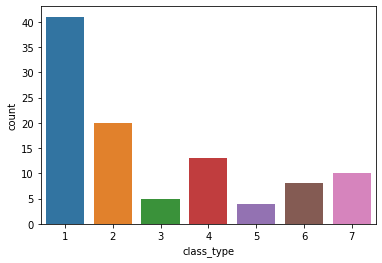

In [13]:
sns.countplot(zoo['class_type'],label="Count")

In [14]:
x_data = zoo.iloc[:,:-1]
x_data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [15]:
y_data = zoo.iloc[:,-1:]
y_data.head()

,class_type
0,1
1,1
2,4
3,1
4,1


In [16]:
print("Feature Data :", x_data.shape)
print("Label Data :", y_data.shape)

Feature Data : (101, 17)
Label Data : (101, 1)


In [17]:
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.3, random_state=42, stratify=y_data)
print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 17)
Testing Data has (31, 17)


In [18]:
train_name = train_x['animal_name']
test_name = test_x['animal_name']

train_x = train_x.iloc[:,1:]
test_x = test_x.iloc[:,1:]

print("Training Data has",train_x.shape)
print("Testing Data has",test_x.shape)

Training Data has (70, 16)
Testing Data has (31, 16)


In [19]:
X = tf.placeholder(tf.float32, [None,16]) 
Y = tf.placeholder(tf.int32, [None, 1])

In [20]:
Y_one_hot = tf.one_hot(Y, 7)  # one hot encoding
Y_one_hot = tf.reshape(Y_one_hot, [-1, 7])

In [21]:
W = tf.Variable(tf.random_normal([16, 7],seed=0), name='weight')
b = tf.Variable(tf.random_normal([7],seed=0), name='bias')

In [22]:
logits = tf.matmul(X, W) + b


In [23]:
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)

In [24]:
train  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [25]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 3.402	Acc: 30.00%
Step:  1000	Loss: 0.135	Acc: 87.14%
Step:  2000	Loss: 0.076	Acc: 90.00%
Step:  3000	Loss: 0.054	Acc: 90.00%
Step:  4000	Loss: 0.043	Acc: 90.00%
Step:  5000	Loss: 0.037	Acc: 90.00%
Model Prediction = 0.9
Test Prediction = 0.9354839


In [27]:
sub = pd.DataFrame()
sub['Name'] = test_name
sub['Predict_Type'] = test_predict
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub

,Name,Predict_Type,Origin_Type,Correct
100,wren,2,2,True
58,penguin,2,2,True
43,lark,2,2,True
21,duck,2,2,True
10,cheetah,1,1,True
40,housefly,6,6,True
50,mongoose,1,1,True
4,boar,1,1,True
87,swan,2,2,True
80,slowworm,3,3,True
